In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from loguru import logger
from ff_tiers.clustering import TierAnalyzer
from ff_tiers.download import get_ranking_data, fetch_all_rankings

In [3]:
rankings_df = fetch_all_rankings(week=12)


2024-11-21 10:39:30.245 | DEBUG    | ff_tiers.download:get_ranking_data:16 - Fetching ranking data for position QB for week 12
2024-11-21 10:39:30.582 | DEBUG    | ff_tiers.download:get_ranking_data:16 - Fetching ranking data for position RB for week 12
2024-11-21 10:39:30.861 | DEBUG    | ff_tiers.download:get_ranking_data:16 - Fetching ranking data for position WR for week 12
2024-11-21 10:39:31.129 | DEBUG    | ff_tiers.download:get_ranking_data:16 - Fetching ranking data for position TE for week 12
2024-11-21 10:39:31.394 | DEBUG    | ff_tiers.download:get_ranking_data:16 - Fetching ranking data for position FLX for week 12
2024-11-21 10:39:31.662 | DEBUG    | ff_tiers.download:get_ranking_data:16 - Fetching ranking data for position K for week 12
2024-11-21 10:39:31.924 | DEBUG    | ff_tiers.download:get_ranking_data:16 - Fetching ranking data for position DST for week 12


In [4]:
rankings_df

,player_id,position,name,last_updated,team,rank_ecr,rank_min,rank_max,rank_ave,rank_std,opponent
0,19275,QB,Jalen Hurts,11/21,PHI,1,1,2,1.18,0.39,LAR
1,17233,QB,Lamar Jackson,11/21,BAL,2,1,3,2.00,0.43,LAC
2,22902,QB,Jayden Daniels,11/21,WAS,3,1,6,3.59,0.94,DAL
3,18635,QB,Justin Herbert,11/21,LAC,4,3,6,3.68,0.82,BAL
4,18600,QB,Kyler Murray,11/21,ARI,5,3,8,5.41,1.27,SEA
...,...,...,...,...,...,...,...,...,...,...,...
731,8280,DST,Los Angeles Rams,11/21,LAR,22,18,24,21.25,1.95,PHI
732,8220,DST,Las Vegas Raiders,11/21,LV,23,20,25,22.88,1.11,DEN
733,8080,DST,Dallas Cowboys,11/21,DAL,24,18,25,22.94,2.01,WAS
734,8130,DST,Indianapolis Colts,11/21,IND,25,21,26,24.69,1.16,DET


<Figure size 640x480 with 0 Axes>

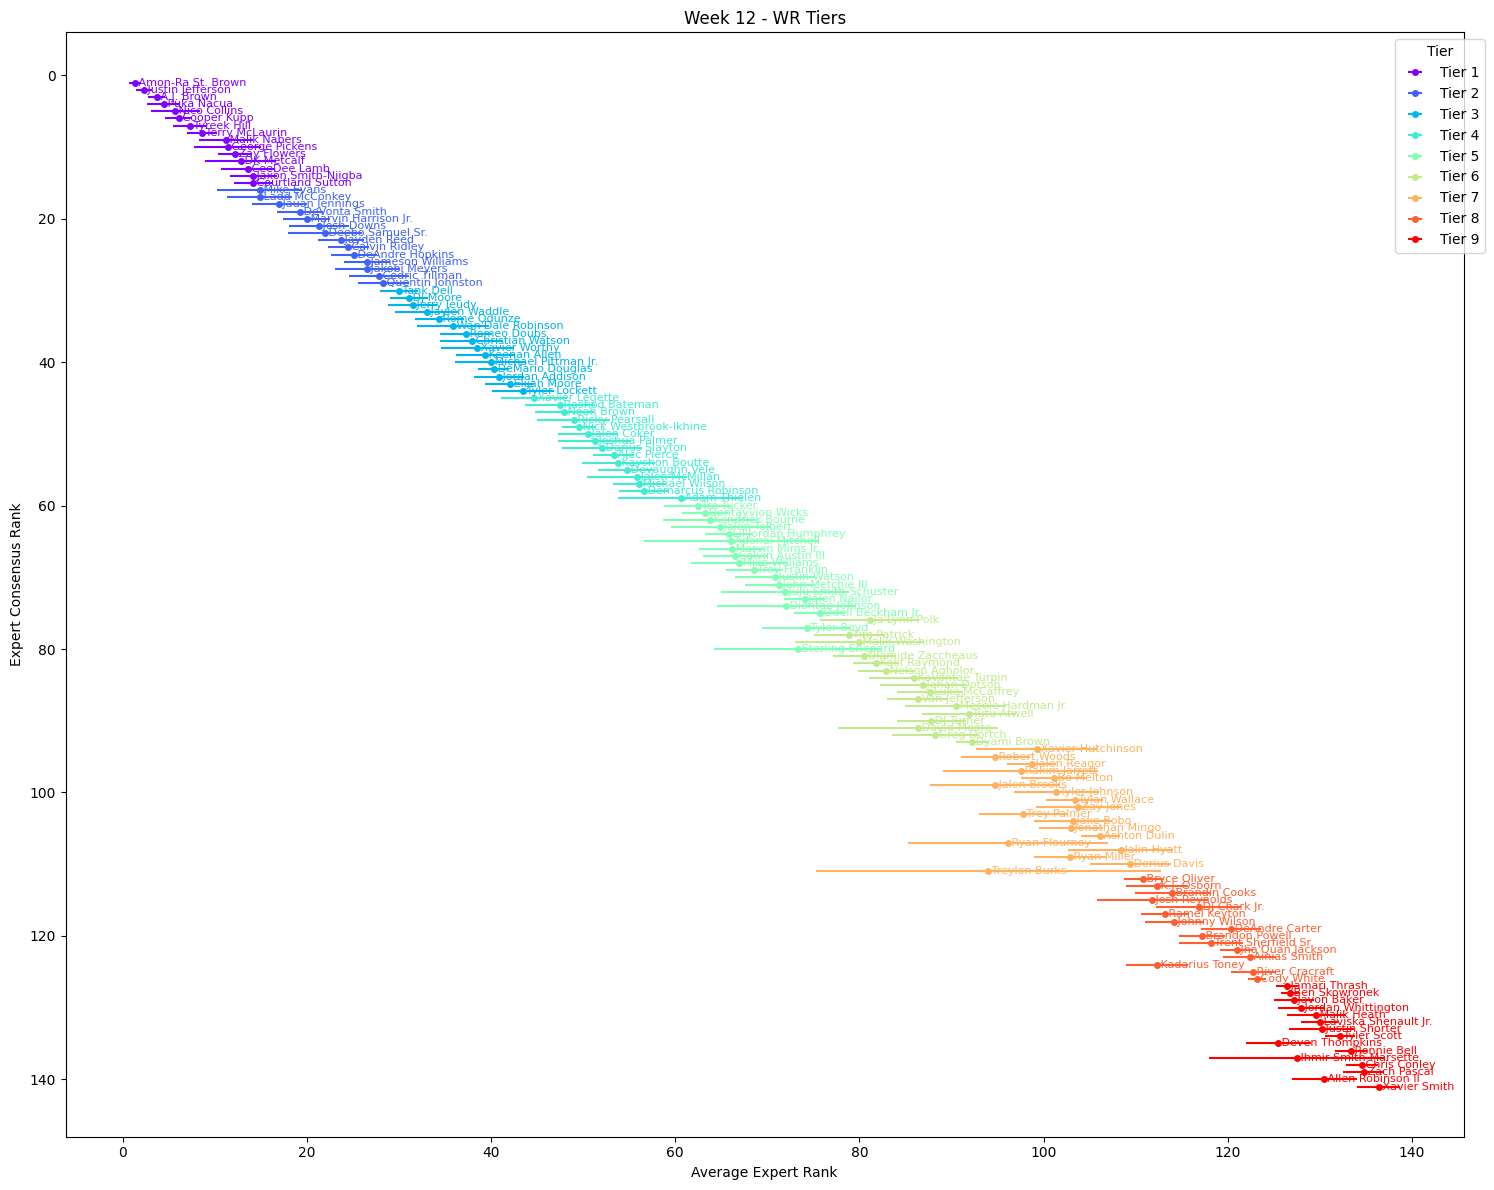

In [5]:
analyzer = TierAnalyzer(rankings_df)

analyzer.plot_tiers("WR", week=12)

In [6]:
# Get tiers for a specific position
pos_tiers = analyzer.create_tiers("WR")

In [7]:
pos_tiers

,player_id,position,name,last_updated,team,rank_ecr,rank_min,rank_max,rank_ave,rank_std,opponent,tier
137,19799,WR,Amon-Ra St. Brown,11/21,DET,1,1,3,1.33,0.64,IND,1
138,19236,WR,Justin Jefferson,11/21,MIN,2,1,5,2.29,0.88,CHI,1
139,18218,WR,A.J. Brown,11/21,PHI,3,2,5,3.67,0.94,LAR,1
140,23180,WR,Puka Nacua,11/21,LAR,4,2,8,4.43,1.76,PHI,1
141,20130,WR,Nico Collins,11/21,HOU,5,2,13,5.71,2.69,TEN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
273,20116,WR,Ihmir Smith-Marsette,11/21,NYG,137,118,137,127.50,9.50,TB,9
274,14151,WR,Chris Conley,11/21,SF,138,132,136,134.60,1.74,GB,9
275,16972,WR,Zach Pascal,11/21,ARI,139,131,138,134.80,2.23,SEA,9
276,12126,WR,Allen Robinson II,11/21,DET,140,127,134,130.50,3.50,IND,9


In [8]:
max_tier = int(pos_tiers["tier"].max())

In [19]:
for i in range(1, max_tier):
    sub_pos_df = pos_tiers[pos_tiers['tier'] == i]
    print(f"Tier {i}: {', '.join(sub_pos_df['name'].tolist())}\n")

Tier 1: Amon-Ra St. Brown, Justin Jefferson, A.J. Brown, Puka Nacua, Nico Collins, Cooper Kupp, Tyreek Hill, Terry McLaurin, Malik Nabers, George Pickens, Zay Flowers, DK Metcalf, CeeDee Lamb, Jaxon Smith-Njigba, Courtland Sutton

Tier 2: Mike Evans, Ladd McConkey, Jauan Jennings, DeVonta Smith, Marvin Harrison Jr., Josh Downs, Deebo Samuel Sr., Jayden Reed, Calvin Ridley, DeAndre Hopkins, Jameson Williams, Jakobi Meyers, Cedric Tillman, Quentin Johnston

Tier 3: Tank Dell, DJ Moore, Jerry Jeudy, Jaylen Waddle, Rome Odunze, Wan'Dale Robinson, Romeo Doubs, Christian Watson, Xavier Worthy, Keenan Allen, Michael Pittman Jr., DeMario Douglas, Jordan Addison, Elijah Moore, Tyler Lockett

Tier 4: Xavier Legette, Rashod Bateman, Noah Brown, Ricky Pearsall, Nick Westbrook-Ikhine, Jalen Coker, Joshua Palmer, Darius Slayton, Alec Pierce, Kayshon Boutte, Devaughn Vele, Jalen McMillan, Michael Wilson, Demarcus Robinson, Adam Thielen

Tier 5: Tre Tucker, Dontayvion Wicks, Kendrick Bourne, Jalen Tol

In [ ]:
response = get_ranking_data("FLX", 8)

In [ ]:

response.json()